In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
income_df= pd.read_csv('../Data/PLACES__Local_Data_for_Better_Health__County_Data_2024_release.csv')

C:\Users\khare\AppData\Local\Temp\ipykernel_31412\564669769.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  income_df= pd.read_csv('../Data/PLACES__Local_Data_for_Better_Health__County_Data_2024_release.csv')


In [3]:
income_df.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2022,US,United States,NaN,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Crude prevalence,12.0,...,11.8,12.2,333287557,260836730,59,HLTHOUT,DIABETES,CrdPrv,Diabetes,NaN
1,2022,CO,Colorado,Lake,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,2.4,...,2.2,2.6,7327,5862,8065,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-106.344971513974 39.2024367117474)
2,2022,CO,Colorado,Mesa,BRFSS,Disability,Hearing disability among adults,%,Crude prevalence,7.1,...,6.3,8.0,158636,126505,8077,DISABLT,HEARING,CrdPrv,Hearing Disability,POINT (-108.466537411781 39.0183551841305)
3,2022,CT,Connecticut,Capitol,BRFSS,Health Outcomes,Arthritis among adults,%,Crude prevalence,26.2,...,24.4,28.4,981447,783914,9110,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-72.5720699045246 41.8184543884154)
4,2022,FL,Florida,Alachua,BRFSS,Health Outcomes,Arthritis among adults,%,Age-adjusted prevalence,24.4,...,21.7,27.2,284030,234132,12001,HLTHOUT,ARTHRITIS,AgeAdjPrv,Arthritis,POINT (-82.3582005204153 29.6751856950068)


In [4]:
income_df.shape

(240886, 22)

In [5]:
income_df['LocationName'].count()

240806

In [6]:
income_df['Year'].value_counts()

Year
2022    216262
2021     24624
Name: count, dtype: int64

In [7]:
income_df['LocationName'].nunique()

1838

In [8]:
income_df['LocationName'].isna().value_counts()

LocationName
False    240806
True         80
Name: count, dtype: int64

In [9]:
income_df['Geolocation'].isna().value_counts()

Geolocation
False    240806
True         80
Name: count, dtype: int64

In [10]:
#dropping NAN values and removing rows that contain NAN values
income_cleane = income_df.dropna(subset=['LocationName'])

In [11]:
income_cleane.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
1,2022,CO,Colorado,Lake,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,2.4,...,2.2,2.6,7327,5862,8065,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-106.344971513974 39.2024367117474)
2,2022,CO,Colorado,Mesa,BRFSS,Disability,Hearing disability among adults,%,Crude prevalence,7.1,...,6.3,8.0,158636,126505,8077,DISABLT,HEARING,CrdPrv,Hearing Disability,POINT (-108.466537411781 39.0183551841305)
3,2022,CT,Connecticut,Capitol,BRFSS,Health Outcomes,Arthritis among adults,%,Crude prevalence,26.2,...,24.4,28.4,981447,783914,9110,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-72.5720699045246 41.8184543884154)
4,2022,FL,Florida,Alachua,BRFSS,Health Outcomes,Arthritis among adults,%,Age-adjusted prevalence,24.4,...,21.7,27.2,284030,234132,12001,HLTHOUT,ARTHRITIS,AgeAdjPrv,Arthritis,POINT (-82.3582005204153 29.6751856950068)
5,2022,FL,Florida,Glades,BRFSS,Health Outcomes,Arthritis among adults,%,Crude prevalence,33.1,...,32.2,34.0,12454,10791,12043,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-81.1891415991292 26.9564177202841)


In [12]:
#split table year 2021 and 2022
income_2021 = income_cleane[income_cleane['Year'].isin([2021])]
income_2022 = income_cleane[income_cleane['Year'].isin([2022])]

In [13]:
#income_2022

In [14]:
#create dataset group by state, county and measures
income_2021=income_2021.sort_values(by= ['StateAbbr', 'LocationName', 'Measure'])

In [15]:
income_2021 = income_2021[['Year','StateAbbr', 'LocationName', 'Measure', 'Data_Value', 'Geolocation']]

In [16]:
income_2021.head()

,Year,StateAbbr,LocationName,Measure,Data_Value,Geolocation
11415,2021,AK,Aleutians East,Cholesterol screening among adults,72.6,POINT (-161.964571410747 55.359979555826)
17820,2021,AK,Aleutians East,Cholesterol screening among adults,73.3,POINT (-161.964571410747 55.359979555826)
8461,2021,AK,Aleutians East,High blood pressure among adults,31.3,POINT (-161.964571410747 55.359979555826)
12647,2021,AK,Aleutians East,High blood pressure among adults,30.5,POINT (-161.964571410747 55.359979555826)
2076,2021,AK,Aleutians East,High cholesterol among adults who have ever be...,31.3,POINT (-161.964571410747 55.359979555826)


In [17]:
pivoted_2021 = income_2021.pivot_table(
    index=('Year', 'StateAbbr', 'LocationName', 'Geolocation'), 
    columns='Measure', 
    values=['Data_Value']  
    
)

In [18]:
pivoted_2021.head()

Data_Value  \
Measure                                                                  Cholesterol screening among adults   
Year StateAbbr LocationName   Geolocation                                                                     
2021 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                               72.95   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                              73.65   
               Anchorage      POINT (-149.112545841578 61.150482370682)                               78.30   
               Bethel         POINT (-159.82324096097 60.9128860869079)                               66.00   
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                              77.75   

                                                                                                           \
Measure                                                                  High blood pressure among adults   
Year StateAbbr LocationName   Geolocation                                                                   
2021 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                             30.90   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                            28.55   
               Anchorage      POINT (-149.112545841578 61.150482370682)                             26.85   
               Bethel         POINT (-159.82324096097 60.9128860869079)                             35.35   
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                            30.80   

                                                                                                                                    \
Measure                                                                  High cholesterol among adults who have ever been screened   
Year StateAbbr LocationName   Geolocation                                                                                            
2021 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                                               30.05          
               Aleutians West POINT (-110.244912258458 52.7943036111183)                                              30.60          
               Anchorage      POINT (-149.112545841578 61.150482370682)                                               28.05          
               Bethel         POINT (-159.82324096097 60.9128860869079)                                               28.65          
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                                              29.95          

                                                                                                                                                               
Measure                                                                  Taking medicine to control high blood pressure among adults with high blood pressure  
Year StateAbbr LocationName   Geolocation                                                                                                                      
2021 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                                               62.25                                    
               Aleutians West POINT (-110.244912258458 52.7943036111183)                                              59.25                                    
               Anchorage      POINT (-149.112545841578 61.150482370682)                                               60.35                                    
               Bethel         POINT (-159.82324096097 60.9128860869079)                                               58.70                                    
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                                              60.80

In [19]:
#Remove the level 0 index and reset the row index
pivoted_2021 = pivoted_2021.droplevel(0,axis=1) 
pivoted_2021 = pivoted_2021.reset_index(level='Year')
pivoted_2021 = pivoted_2021.reset_index(level='LocationName')
pivoted_2021 = pivoted_2021.reset_index(level='Geolocation')
pivoted_2021 = pivoted_2021.reset_index(level='StateAbbr')

In [20]:
pivoted_2021.head()

Measure,StateAbbr,Geolocation,LocationName,Year,Cholesterol screening among adults,High blood pressure among adults,High cholesterol among adults who have ever been screened,Taking medicine to control high blood pressure among adults with high blood pressure
0,AK,POINT (-161.964571410747 55.359979555826),Aleutians East,2021,72.95,30.90,30.05,62.25
1,AK,POINT (-110.244912258458 52.7943036111183),Aleutians West,2021,73.65,28.55,30.60,59.25
2,AK,POINT (-149.112545841578 61.150482370682),Anchorage,2021,78.30,26.85,28.05,60.35
3,AK,POINT (-159.82324096097 60.9128860869079),Bethel,2021,66.00,35.35,28.65,58.70
4,AK,POINT (-156.700132487576 58.7440261738219),Bristol Bay,2021,77.75,30.80,29.95,60.80


In [21]:
#export to csv file
pivoted_2021.to_csv('health_2021.csv', index=False)

In [22]:
income_2022=income_2022.sort_values(by= ['StateAbbr', 'LocationName', 'Measure'])
income_2022 = income_2022[['Year','StateAbbr', 'LocationName', 'Measure', 'Data_Value', 'Geolocation']]

In [23]:
income_2022.head()

,Year,StateAbbr,LocationName,Measure,Data_Value,Geolocation
11724,2022,AK,Aleutians East,All teeth lost among adults aged >=65 years,16.9,POINT (-161.964571410747 55.359979555826)
15811,2022,AK,Aleutians East,All teeth lost among adults aged >=65 years,16.9,POINT (-161.964571410747 55.359979555826)
6942,2022,AK,Aleutians East,Any disability among adults,30.9,POINT (-161.964571410747 55.359979555826)
9338,2022,AK,Aleutians East,Any disability among adults,29.5,POINT (-161.964571410747 55.359979555826)
4986,2022,AK,Aleutians East,Arthritis among adults,19.8,POINT (-161.964571410747 55.359979555826)


In [24]:
pivoted_2022 = income_2022.pivot_table(
    index=('Year', 'StateAbbr', 'LocationName', 'Geolocation'), 
    columns='Measure', 
    values=['Data_Value']  
    
)

In [25]:
pivoted_2022.head()

Data_Value  \
Measure                                                                  All teeth lost among adults aged >=65 years   
Year StateAbbr LocationName   Geolocation                                                                              
2022 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                                        16.90   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                                       14.85   
               Anchorage      POINT (-149.112545841578 61.150482370682)                                        12.95   
               Bethel         POINT (-159.82324096097 60.9128860869079)                                        31.00   
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                                       12.30   

                                                                                                      \
Measure                                                                  Any disability among adults   
Year StateAbbr LocationName   Geolocation                                                              
2022 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                        30.20   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                       27.45   
               Anchorage      POINT (-149.112545841578 61.150482370682)                        25.90   
               Bethel         POINT (-159.82324096097 60.9128860869079)                        44.20   
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                       30.55   

                                                                                                 \
Measure                                                                  Arthritis among adults   
Year StateAbbr LocationName   Geolocation                                                         
2022 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                   18.70   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                  17.40   
               Anchorage      POINT (-149.112545841578 61.150482370682)                   21.80   
               Bethel         POINT (-159.82324096097 60.9128860869079)                   27.25   
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                  24.30   

                                                                                                      \
Measure                                                                  Binge drinking among adults   
Year StateAbbr LocationName   Geolocation                                                              
2022 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                        16.45   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                       19.95   
               Anchorage      POINT (-149.112545841578 61.150482370682)                        19.30   
               Bethel         POINT (-159.82324096097 60.9128860869079)                        18.55   
               Bristol Bay    POINT (-156.700132487576 58.7440261738219)                       21.30   

                                                                                                                     \
Measure                                                                  Cancer (non-skin) or melanoma among adults   
Year StateAbbr LocationName   Geolocation                                                                             
2022 AK        Aleutians East POINT (-161.964571410747 55.359979555826)                                        4.50   
               Aleutians West POINT (-110.244912258458 52.7943036111183)                                       4.50   
               Anchorage      POINT (-149.112545841578 61.150482370682)                    

In [26]:
#Remove the level 0 index and reset the row index
pivoted_2022 = pivoted_2022.droplevel(0,axis=1) 
pivoted_2022 = pivoted_2022.reset_index(level='Year')
pivoted_2022 = pivoted_2022.reset_index(level='LocationName')
pivoted_2022 = pivoted_2022.reset_index(level='Geolocation')
pivoted_2022 = pivoted_2022.reset_index(level='StateAbbr')

In [27]:
pivoted_2022.head()

Measure,StateAbbr,Geolocation,LocationName,Year,All teeth lost among adults aged >=65 years,Any disability among adults,Arthritis among adults,Binge drinking among adults,Cancer (non-skin) or melanoma among adults,Chronic obstructive pulmonary disease among adults,...,No leisure-time physical activity among adults,Obesity among adults,Received food stamps in the past 12 months among adults,Self-care disability among adults,Short sleep duration among adults,Stroke among adults,Utility services shut-off threat in the past 12 months among adults,Vision disability among adults,Visited dentist or dental clinic in the past year among adults,Visits to doctor for routine checkup within the past year among adults
0,AK,POINT (-161.964571410747 55.359979555826),Aleutians East,2022,16.90,30.20,18.70,16.45,4.50,5.25,...,30.1,31.30,14.90,3.75,42.30,3.65,8.45,6.40,47.85,64.15
1,AK,POINT (-110.244912258458 52.7943036111183),Aleutians West,2022,14.85,27.45,17.40,19.95,4.50,4.75,...,26.9,29.50,12.00,3.15,39.55,3.05,7.95,5.40,51.40,62.20
2,AK,POINT (-149.112545841578 61.150482370682),Anchorage,2022,12.95,25.90,21.80,19.30,6.55,4.65,...,19.8,29.60,9.45,2.70,34.65,2.65,7.20,4.15,64.20,67.75
3,AK,POINT (-159.82324096097 60.9128860869079),Bethel,2022,31.00,44.20,27.25,18.55,5.65,10.65,...,34.7,41.30,36.40,6.85,41.85,5.95,18.55,10.35,37.00,63.85
4,AK,POINT (-156.700132487576 58.7440261738219),Bristol Bay,2022,12.30,30.55,24.30,21.30,7.40,6.75,...,21.3,32.05,10.50,3.50,37.50,3.80,8.05,5.15,58.55,65.10


In [28]:
pivoted_2022.columns

Index(['StateAbbr', 'Geolocation', 'LocationName', 'Year',
       'All teeth lost among adults aged >=65 years',
       'Any disability among adults', 'Arthritis among adults',
       'Binge drinking among adults',
       'Cancer (non-skin) or melanoma among adults',
       'Chronic obstructive pulmonary disease among adults',
       'Cognitive disability among adults',
       'Colorectal cancer screening among adults aged 45–75 years',
       'Coronary heart disease among adults', 'Current asthma among adults',
       'Current cigarette smoking among adults',
       'Current lack of health insurance among adults aged 18-64 years',
       'Depression among adults', 'Diagnosed diabetes among adults',
       'Fair or poor self-rated health status among adults',
       'Feeling socially isolated among adults',
       'Food insecurity in the past 12 months among adults',
       'Frequent mental distress among adults',
       'Frequent physical distress among adults',
       'Hearing disabi

In [29]:
#export to csv file
pivoted_2022.to_csv('health_2022.csv', index=False)

In [30]:
#Read unimployment data
unemployment_df= pd.read_csv('../Data/Unemployment.csv')

In [31]:
unemployment_df.head()

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0


In [32]:
pivoted_un = unemployment_df.pivot_table(
    index=('State', 'Area_Name'), 
    columns='Attribute', 
    values=['Value'],
    sort=False
    
)

In [33]:
pivoted_un.head()

Value                \
Attribute                Civilian_labor_force_2000 Employed_2000   
State Area_Name                                                    
US    United States                    142601576.0   136904853.0   
AL    Alabama                            2147173.0     2047731.0   
      Autauga County, AL                   21861.0       20971.0   
      Baldwin County, AL                   69979.0       67370.0   
      Barbour County, AL                   11449.0       10812.0   

                                                                 \
Attribute                Unemployed_2000 Unemployment_rate_2000   
State Area_Name                                                   
US    United States            5696723.0                    4.0   
AL    Alabama                    99442.0                    4.6   
      Autauga County, AL           890.0                    4.1   
      Baldwin County, AL          2609.0                    3.7   
      Barbour County, AL           637.0                    5.6   

                                                                  \
Attribute                Civilian_labor_force_2001 Employed_2001   
State Area_Name                                                    
US    United States                    143786537.0   136977996.0   
AL    Alabama                            2128027.0     2017467.0   
      Autauga County, AL                   22081.0       21166.0   
      Baldwin County, AL                   69569.0       66545.0   
      Barbour County, AL                   11324.0       10468.0   

                                                                 \
Attribute                Unemployed_2001 Unemployment_rate_2001   
State Area_Name                                                   
US    United States            6808541.0                    4.7   
AL    Alabama                   110560.0                    5.2   
      Autauga County, AL           915.0                    4.1   
      Baldwin County, AL          3024.0                    4.3   
      Barbour County, AL           856.0                    7.6   

                                                                  ...  \
Attribute                Civilian_labor_force_2002 Employed_2002  ...   
State Area_Name                                                   ...   
US    United States                    144839298.0   136455783.0  ...   
AL    Alabama                            2112621.0     1987633.0  ...   
      Autauga County, AL                   22161.0       21096.0  ...   
      Baldwin County, AL                   69379.0       65881.0  ...   
      Barbour County, AL                   11006.0       10154.0  ...   

                                                                           \
Attribute                Unemployment_rate_2021 Civilian_labor_force_2022   
State Area_Name                                                             
US    United States                         5.4               164781642.0   
AL    Alabama                               3.4                 2286028.0   
      Autauga County, AL                    2.8                   26789.0   
      Baldwin County, AL                    2.9                  102849.0   
      Barbour County, AL                    5.5                    8241.0   

                                                                               \
Attribute                Employed_2022 Unemployed_2022 Unemployment_rate_2022   
State Area_Name                                                                 
US    United States        158766998.0       6014644.0                    3.7   
AL    Alabama                2226670.0         59358.0                    2.6   
      Autauga County, AL       26181.0           608.0                    2.3   
      Baldwin County, AL      100432.0          2417.0                    2.4   
      Barbour County, AL        7906.0           335.0                    4.1   

                              

In [34]:
#print(pivoted_un.columns)

In [35]:
print(pivoted_un.index.names)

['State', 'Area_Name']


In [36]:
#Remove the level 0 index and reset the row index
pivoted_un = pivoted_un.droplevel(0,axis=1) 
#pivoted_un = pivoted_un.reset_index()
pivoted_un = pivoted_un.reset_index(level='Area_Name')
pivoted_un = pivoted_un.reset_index(level='State')


In [37]:
pivoted_un.to_csv('pivot_u.csv', index=False)

In [38]:
state_df = pivoted_un.groupby('State', as_index=False).first()

In [39]:
state_df=state_df[['Area_Name', 'Unemployment_rate_2021', 'Unemployment_rate_2022']]

In [40]:
state_df

Attribute,Area_Name,Unemployment_rate_2021,Unemployment_rate_2022
0,Alaska,6.4,4.0
1,Alabama,3.4,2.6
2,Arkansas,4.1,3.3
3,Arizona,5.1,3.8
4,California,7.3,4.2
5,Colorado,5.4,3.0
6,Connecticut,6.3,4.2
7,District of Columbia,6.8,4.7
8,Delaware,5.5,4.5
9,Florida,4.6,2.9


In [41]:
Un_Final=pivoted_un[['State', 'Area_Name', 'Unemployment_rate_2021', 'Unemployment_rate_2022', 'Med_HH_Income_Percent_of_State_Total_2021', 'Median_Household_Income_2021']]

In [42]:
Un_Final.head()

Attribute,State,Area_Name,Unemployment_rate_2021,Unemployment_rate_2022,Med_HH_Income_Percent_of_State_Total_2021,Median_Household_Income_2021
0,US,United States,5.4,3.7,NaN,69717.0
1,AL,Alabama,3.4,2.6,100.0,53990.0
2,AL,"Autauga County, AL",2.8,2.3,123.1,66444.0
3,AL,"Baldwin County, AL",2.9,2.4,121.6,65658.0
4,AL,"Barbour County, AL",5.5,4.1,71.6,38649.0


In [43]:
Un_Final['Area_Name'] = Un_Final['Area_Name'].str.split(',').str[0]
Un_Final['Area_Name'] = Un_Final['Area_Name'].str.replace(' County', '', regex=False)


C:\Users\khare\AppData\Local\Temp\ipykernel_31412\2231326507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Un_Final['Area_Name'] = Un_Final['Area_Name'].str.split(',').str[0]
C:\Users\khare\AppData\Local\Temp\ipykernel_31412\2231326507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Un_Final['Area_Name'] = Un_Final['Area_Name'].str.replace(' County', '', regex=False)


In [44]:
Un_Final.head()

Attribute,State,Area_Name,Unemployment_rate_2021,Unemployment_rate_2022,Med_HH_Income_Percent_of_State_Total_2021,Median_Household_Income_2021
0,US,United States,5.4,3.7,NaN,69717.0
1,AL,Alabama,3.4,2.6,100.0,53990.0
2,AL,Autauga,2.8,2.3,123.1,66444.0
3,AL,Baldwin,2.9,2.4,121.6,65658.0
4,AL,Barbour,5.5,4.1,71.6,38649.0


In [45]:
state_df = Un_Final.groupby('State', as_index=False).first()

In [46]:
state_df

Attribute,State,Area_Name,Unemployment_rate_2021,Unemployment_rate_2022,Med_HH_Income_Percent_of_State_Total_2021,Median_Household_Income_2021
0,AK,Alaska,6.4,4.0,100.0,78437.0
1,AL,Alabama,3.4,2.6,100.0,53990.0
2,AR,Arkansas,4.1,3.3,100.0,52577.0
3,AZ,Arizona,5.1,3.8,100.0,68967.0
4,CA,California,7.3,4.2,100.0,84831.0
5,CO,Colorado,5.4,3.0,100.0,82228.0
6,CT,Connecticut,6.3,4.2,100.0,83628.0
7,DC,District of Columbia,6.8,4.7,100.0,91072.0
8,DE,Delaware,5.5,4.5,100.0,71636.0
9,FL,Florida,4.6,2.9,100.0,63054.0


In [48]:
#Un_Final.to_csv('un_final.csv', index=False)

In [50]:
#calculate least and high unemployment county in 2021 and 2022
county_min=pivoted_un.loc[pivoted_un['Unemployment_rate_2021'].idxmin()]
county_mxn=pivoted_un.loc[pivoted_un['Unemployment_rate_2021'].idxmax()]


In [52]:
county_min

Attribute
State                                                     TX
Area_Name                                    King County, TX
Civilian_labor_force_2000                              212.0
Employed_2000                                          205.0
Unemployed_2000                                          7.0
                                                  ...       
Median_Household_Income_2021                         74890.0
Med_HH_Income_Percent_of_State_Total_2021              111.8
Rural_Urban_Continuum_Code_2013                          9.0
Urban_Influence_Code_2013                               12.0
Metro_2013                                               0.0
Name: 2705, Length: 99, dtype: object

In [54]:
county_mxn

Attribute
State                                                              AK
Area_Name                                    Kusilvak Census Area, AK
Civilian_labor_force_2000                                      2237.0
Employed_2000                                                  1897.0
Unemployed_2000                                                 340.0
                                                       ...           
Median_Household_Income_2021                                  38203.0
Med_HH_Income_Percent_of_State_Total_2021                        48.7
Rural_Urban_Continuum_Code_2013                                   9.0
Urban_Influence_Code_2013                                        12.0
Metro_2013                                                        0.0
Name: 86, Length: 99, dtype: object

In [56]:
county_min = Un_Final.loc[Un_Final.groupby('Area_Name')['Unemployment_rate_2021'].idxmax().dropna()]

In [58]:
County_min_sorted = county_min.sort_values('Unemployment_rate_2021')

In [60]:
County_min_sorted=County_min_sorted.drop(columns=['Med_HH_Income_Percent_of_State_Total_2021', 'Median_Household_Income_2021'])

In [62]:
County_min_sorted

Attribute,State,Area_Name,Unemployment_rate_2021,Unemployment_rate_2022
2721,TX,Loving,1.0,0.6
1731,NE,Hooker,1.6,2.7
1728,NE,Hayes,1.6,1.7
985,KS,Rawlins,1.6,1.8
1701,NE,Cherry,1.7,1.8
...,...,...,...,...
1847,NM,Luna,15.3,9.9
2784,TX,Starr,15.6,11.0
1461,MS,Jefferson,15.8,13.0
209,CA,Imperial,17.5,14.7


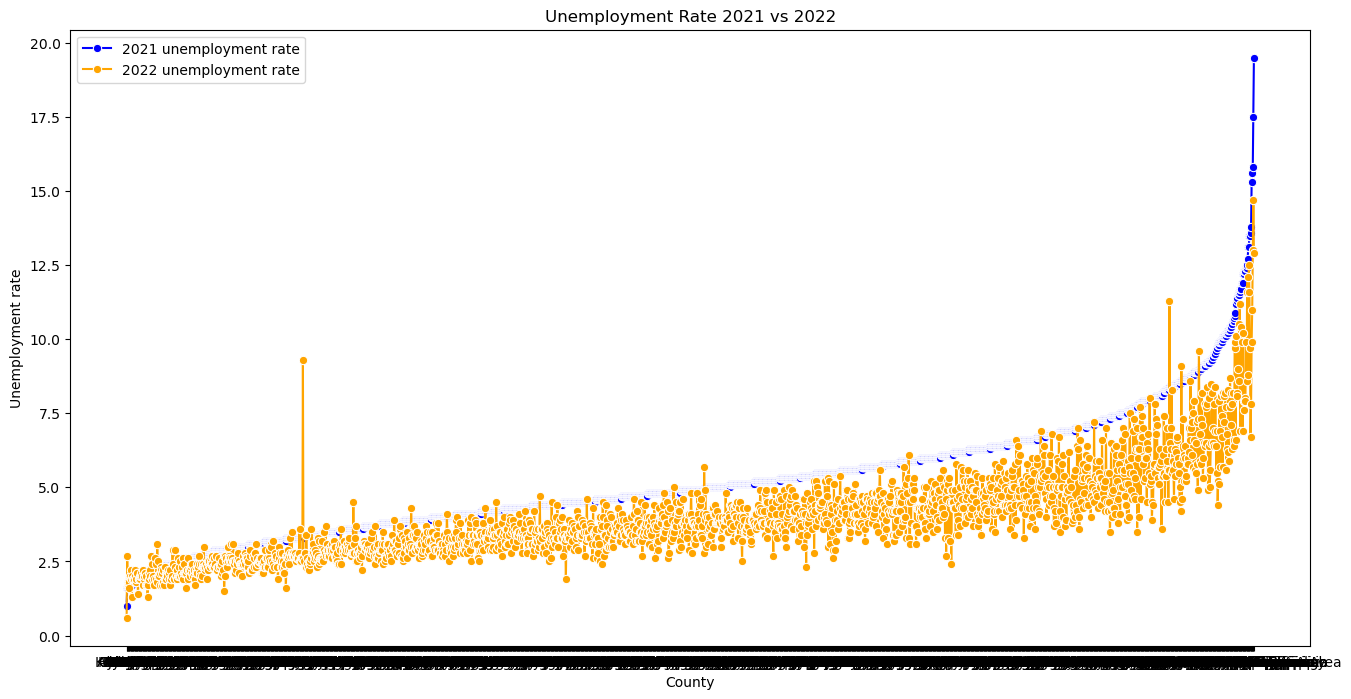

In [64]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=County_min_sorted, x='Area_Name', y='Unemployment_rate_2021', label='2021 unemployment rate', marker='o', color='blue')
sns.lineplot(data=County_min_sorted, x='Area_Name', y='Unemployment_rate_2022', label='2022 unemployment rate', marker='o', color='orange')

plt.xlabel('County')
plt.ylabel('Unemployment rate')
plt.title('Unemployment Rate 2021 vs 2022')
plt.legend()
plt.show()

In [65]:
County_min_ky = County_min_sorted[County_min_sorted['State'].isin(['KY'])]

In [66]:
County_min_ky

Attribute,State,Area_Name,Unemployment_rate_2021,Unemployment_rate_2022
1058,KY,Green,3.5,3.7
1034,KY,Carlisle,3.7,3.7
1071,KY,Jessamine,3.8,3.2
1073,KY,Kenton,3.9,3.3
1110,KY,Pendleton,3.9,3.5
...,...,...,...,...
1062,KY,Harlan,7.9,6.3
1046,KY,Elliott,7.9,8.0
1027,KY,Breathitt,8.1,7.3
1094,KY,Martin,8.6,7.3


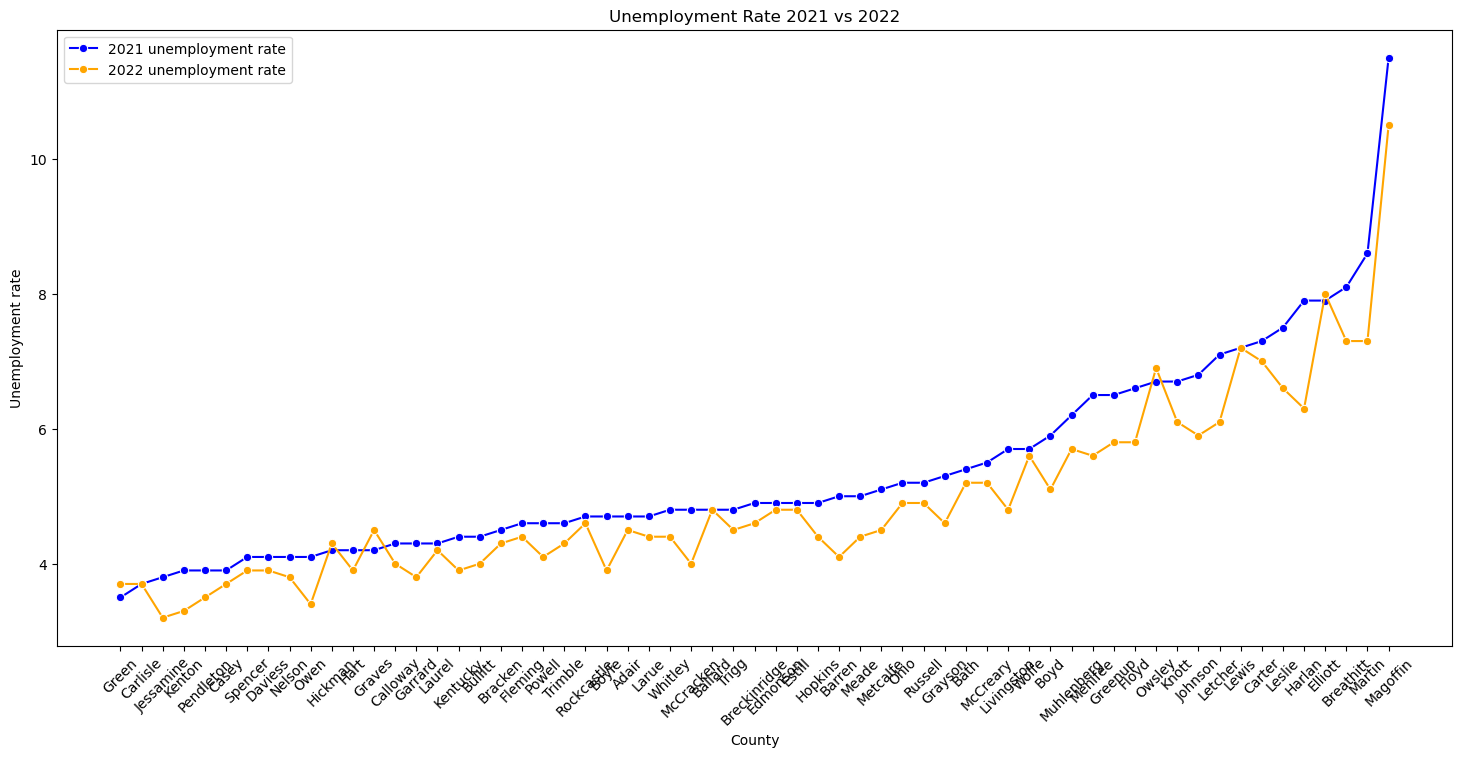

In [67]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=County_min_ky, x='Area_Name', y='Unemployment_rate_2021', label='2021 unemployment rate', marker='o', color='blue')
sns.lineplot(data=County_min_ky, x='Area_Name', y='Unemployment_rate_2022', label='2022 unemployment rate', marker='o', color='orange')

plt.xlabel('County')
plt.ylabel('Unemployment rate')
plt.title('Unemployment Rate 2021 vs 2022')
plt.xticks(rotation=45)
plt.legend()
plt.show()

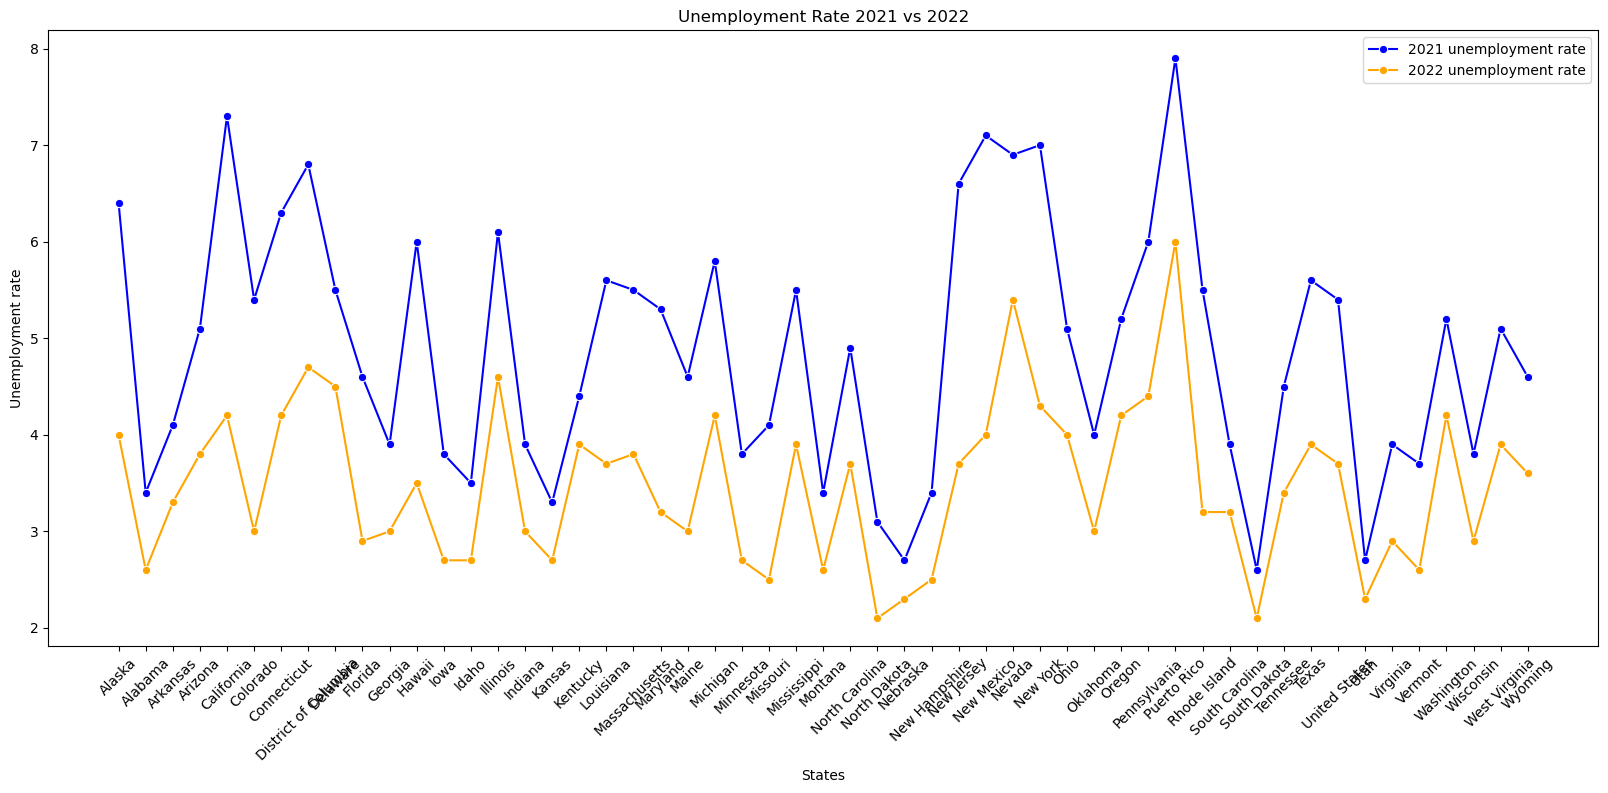

In [79]:
#For State
plt.figure(figsize=(20, 8))
sns.lineplot(data=state_df, x='Area_Name', y='Unemployment_rate_2021', label='2021 unemployment rate', marker='o', color='blue')
sns.lineplot(data=state_df, x='Area_Name', y='Unemployment_rate_2022', label='2022 unemployment rate', marker='o', color='orange')

plt.xlabel('States')
plt.ylabel('Unemployment rate')
plt.title('Unemployment Rate 2021 vs 2022')
plt.xticks(rotation=45)
plt.legend()
plt.show()